In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import dsharp_opac as opacity
from matplotlib.lines import Line2D

fortran mie routines unavailable


/Users/fsco/.local/lib/python3.9/site-packages/dsharp_opac/dsharp_opac.py:42: UserWarning: could not import compiled mie code - mie calculation will be slow
  warnings.warn('could not import compiled mie code - mie calculation will be slow')


In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 1.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.0})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.0})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.0})
plt.rcParams.update({'ytick.minor.width': 1.0})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cm

In [5]:
interval  = np.linspace(0,1,9)
cmap      = plt.get_cmap('YlGnBu')
norm      = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)

color0    = scalarMap.to_rgba(interval[6])#'#64afe3'#'#fea427'
color1    = '#345995'#'#456990'#'#264653'#'#118ab2'#'#456990'#scalarMap.to_rgba(interval[7])#'#4170ad'#scalarMap.to_rgba(interval[0])
color2    = '#57cc99'#'#7dcfb6'#'#2a9d8f'#'#06d6a0'#'#ef767a'#scalarMap.to_rgba(interval[5])#'#e8342e'#scalarMap.to_rgba(interval[2])
color3    = '#f7b801'#'#f79256'#'#f4a261'#'#ffd166'#'#49beaa'#scalarMap.to_rgba(interval[3])#'#79b331'#scalarMap.to_rgba(interval[4])

color     = [color1,color2,color3]

<IPython.core.display.Javascript object>


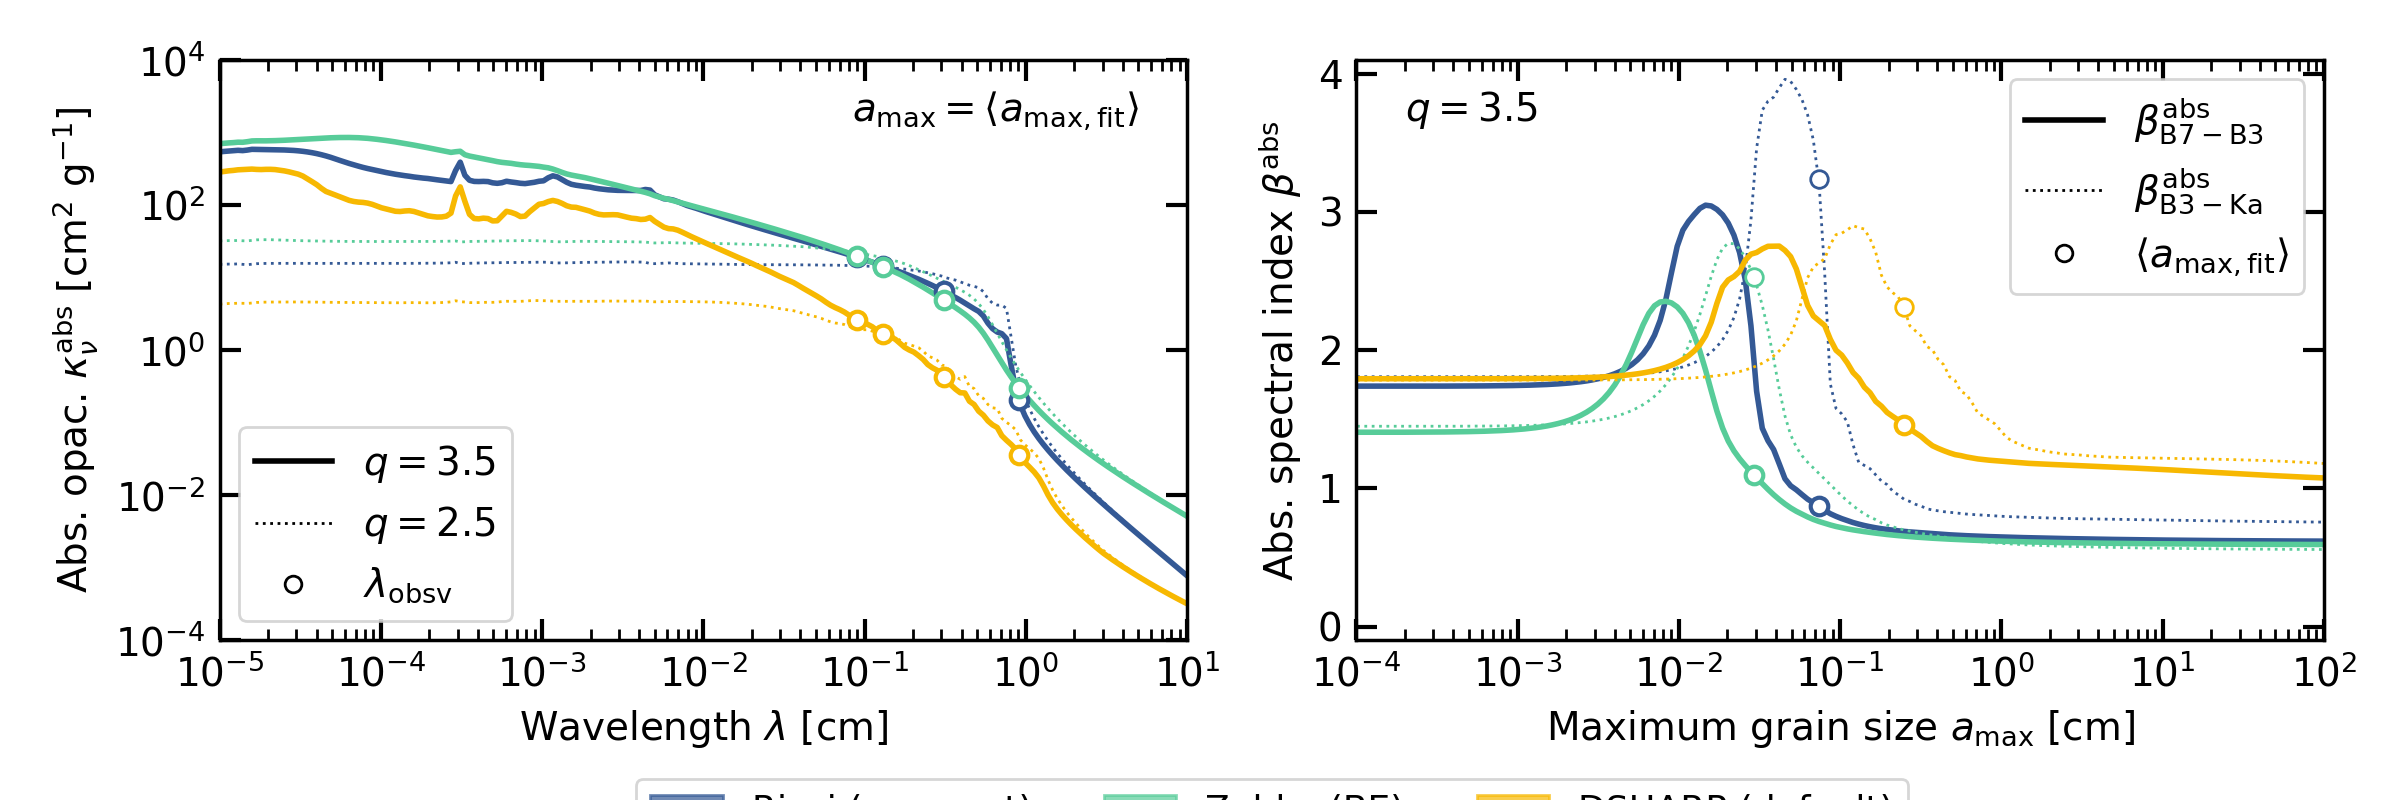

In [6]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

name = ['opacity_Ricci_compact(mine)','opacity_Zubko_BE_Bruggeman','opacity_DSHARP_default']

amax = [0.07355010606864075,0.029171971939557194,0.24829644215772306]

for i in range(len(name)):
    
    d      = np.load('../../optical_constants/{}.npz'.format(name[i]))
    a      = d['a']
    lam    = d['lam']
    k_abs  = d['k_abs']
    k_sca  = d['k_sca']
    gsca   = d['g']

    k_sca_eff = (1 - gsca) * k_sca
    res_eff = opacity.size_average_opacity([0.09,0.31,0.91], a, lam, k_abs, k_sca_eff, q=3.5, plot=False)
    
    beta73  = np.log10(res_eff['ka'][0]/res_eff['ka'][1])/np.log10(0.31/0.09)
    beta3Ka = np.log10(res_eff['ka'][1]/res_eff['ka'][2])/np.log10(0.91/0.31)
    
    axs[1].semilogx(a,beta73, lw=2,c=color[i])
    axs[1].semilogx(a,beta3Ka,lw=1,ls=':',c=color[i])
    
    axs[1].scatter(
        amax[i], np.interp(amax[i],a,beta73), marker='o',s=40,lw=1.5,facecolor='w',edgecolor=color[i],zorder=5
    )
    axs[1].scatter(
        amax[i], np.interp(amax[i],a,beta3Ka),marker='o',s=40,lw=1.0,facecolor='w',edgecolor=color[i],zorder=5
    )
    #omg = res_eff['ks']/(res_eff['ka'] + res_eff['ks'])
    
    #axs[1].semilogx(a,omg[0],lw=2,c=color[i])
    #axs[1].semilogx(a,omg[1],lw=2,c=color[i])
    
    for _q, ls, lw in zip([3.5,2.5],['-',':'],[2,1]):
    
        d      = np.load('../../optical_constants/{}.npz'.format(name[i]))

        s        = d['a']**(4.0 - _q)
        ia       = np.abs(d['a'] - amax[i]).argmin()
        s[ia+1:] = 0.
        s        = s/s.sum()

        k_a_avg = (d['k_abs'].T * s).sum(1)

        axs[0].loglog(d['lam'], k_a_avg, lw=lw, ls=ls, c=color[i])
        if _q == 3.5:
            axs[0].scatter(
                [0.09,0.13,0.31,0.91],np.interp([0.09,0.13,0.31,0.91],d['lam'], k_a_avg),
                marker='o',s=40,lw=1.5,facecolor='w',edgecolor=color[i],zorder=5
            )

axs[1].set_xlim(1e-4,1e2)
axs[1].set_xlabel(r'Maximum grain size $a_{\rm max}$ [cm]')

axs[1].set_ylim(-0.1,4.1)
axs[1].set_ylabel(r'Abs. spectral index $\beta^{\rm abs}$')

legend_elements = [
    Line2D([0], [0], label=r'$\beta^{\rm abs}_{\rm B7-B3}$', ls='-', color='k', lw=2),
    Line2D([0], [0], label=r'$\beta^{\rm abs}_{\rm B3-Ka}$', ls=':', color='k', lw=1),
    Line2D([0], [0], label=r'$\langle a_{\rm max,fit}\rangle$', ls='none', marker='o', mec='k', mfc='w', lw=1.5),
]
axs[1].legend(handles=legend_elements,loc='upper right')

axs[0].set_xlim(1e-5,1e1)
axs[0].set_xlabel(r'Wavelength $\lambda$ [cm]')

axs[0].set_ylim(1e-4,1e4)
axs[0].set_ylabel(r'Abs. opac. $\kappa^{\rm abs}_\nu$ [cm$^2$ g$^{-1}$]')

legend_elements = [
    Line2D([0], [0], label=r'$q=3.5$', ls='-', color='k', lw=2),
    Line2D([0], [0], label=r'$q=2.5$', ls=':', color='k', lw=1),
    Line2D([0], [0], label=r'$\lambda_{\rm obsv}$', ls='none', marker='o', mec='k', mfc='w', lw=1.5),
]
axs[0].legend(handles=legend_elements,loc='lower left')

legend_elements = [
    mpatches.Patch(color=color1, label='Ricci (compact)' , alpha=0.7),
    mpatches.Patch(color=color2, label='Zubko (BE)' , alpha=0.7),
    mpatches.Patch(color=color3, label='DSHARP (default)', alpha=0.7),
]

fig.legend(handles=legend_elements, fontsize=13, loc='lower center', ncol=3, bbox_to_anchor=(0.530,-0.075))

axs[1].text(0.05, 0.95, s=r'$q=3.5$', ha='left', va='top', transform=axs[1].transAxes) #, bbox=dict(boxstyle="round", ec="k", fc="w",)
axs[0].text(0.95, 0.95, s=r'$a_{\rm max}=\langle a_{\rm max,fit}\rangle$', ha='right', va='top', transform=axs[0].transAxes) #, bbox=dict(boxstyle="round", ec="k", fc="w",)

fig.tight_layout()
plt.subplots_adjust(wspace=0.175)

plt.savefig('opacity_comparison.pdf', bbox_inches='tight')
plt.show()